In [110]:
import pandas as pd
import matplotlib as plt 
import numpy as np
import seaborn as sns


In [111]:
df=pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [112]:
df['Sex']=df['Sex'].map({'M':1,'F':0})

In [113]:
df.select_dtypes(include=['object','int','float']).nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [114]:
print(df['ChestPainType'].unique())
print(df['RestingECG'].unique())
print(df['FastingBS'].unique())
print(df['ExerciseAngina'].unique())
print(df['HeartDisease'].unique())
print(df['ST_Slope'].unique())

['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
[0 1]
['N' 'Y']
[0 1]
['Up' 'Flat' 'Down']


In [115]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [116]:
onehot=['ChestPainType','RestingECG','ST_Slope']
df=pd.get_dummies(df,columns=onehot,drop_first=True)


In [117]:
df['ExerciseAngina']=df['ExerciseAngina'].map({'Y':0,'N':1})

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ATA  918 non-null    bool   
 10  ChestPainType_NAP  918 non-null    bool   
 11  ChestPainType_TA   918 non-null    bool   
 12  RestingECG_Normal  918 non-null    bool   
 13  RestingECG_ST      918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(7), float64(1), in

In [119]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,1,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,1,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,1,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,0,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,1,0.0,0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,1,1.2,1,False,False,True,True,False,True,False
914,68,1,144,193,1,141,1,3.4,1,False,False,False,True,False,True,False
915,57,1,130,131,0,115,0,1.2,1,False,False,False,True,False,True,False
916,57,0,130,236,0,174,1,0.0,1,True,False,False,False,False,True,False


In [120]:
df['ChestPainType_ATA']=df['ChestPainType_ATA'].astype(int)

In [121]:
df[['ChestPainType_TA','RestingECG_Normal','ChestPainType_NAP','RestingECG_ST','ST_Slope_Flat','ST_Slope_Up']]=df[['ChestPainType_TA','RestingECG_Normal','ChestPainType_NAP','RestingECG_ST','ST_Slope_Flat','ST_Slope_Up']].astype(int)
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,1,0.0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,1,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,1,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,0,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,1,0.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,1,1.2,1,0,0,1,1,0,1,0
914,68,1,144,193,1,141,1,3.4,1,0,0,0,1,0,1,0
915,57,1,130,131,0,115,0,1.2,1,0,0,0,1,0,1,0
916,57,0,130,236,0,174,1,0.0,1,1,0,0,0,0,1,0


In [122]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
ds=df.copy()
col=['RestingBP','Cholesterol','MaxHR','Age']
ds[col]=scalar.fit_transform(ds[col])
ds

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,0.244898,1,0.70,0.479270,0,0.788732,1,0.0,0,1,0,0,1,0,0,1
1,0.428571,0,0.80,0.298507,0,0.676056,1,1.0,1,0,1,0,1,0,1,0
2,0.183673,1,0.65,0.469320,0,0.267606,1,0.0,0,1,0,0,0,1,0,1
3,0.408163,0,0.69,0.354892,0,0.338028,0,1.5,1,0,0,0,1,0,1,0
4,0.530612,1,0.75,0.323383,0,0.436620,1,0.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,0.55,0.437811,0,0.507042,1,1.2,1,0,0,1,1,0,1,0
914,0.816327,1,0.72,0.320066,1,0.570423,1,3.4,1,0,0,0,1,0,1,0
915,0.591837,1,0.65,0.217247,0,0.387324,0,1.2,1,0,0,0,1,0,1,0
916,0.591837,0,0.65,0.391376,0,0.802817,1,0.0,1,1,0,0,0,0,1,0


In [123]:
X=ds.drop('HeartDisease',axis=1)
y=ds['HeartDisease']

<Axes: >

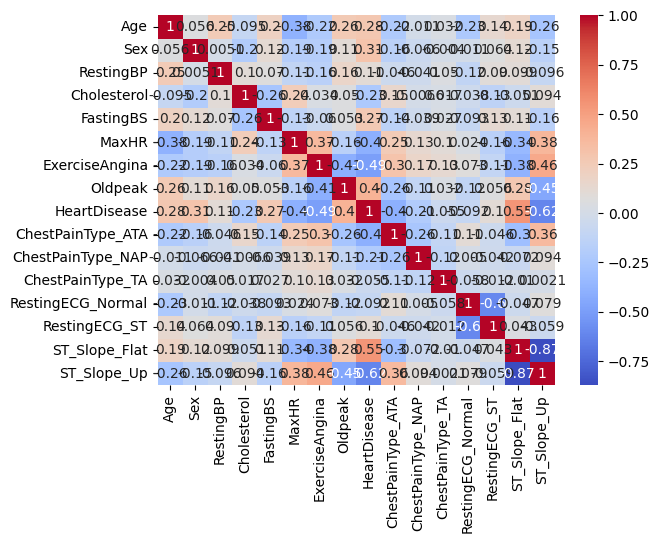

In [124]:
cor=ds.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [126]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=250,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [127]:
y_pred=classifier.predict(X_test)

In [128]:
from sklearn.metrics import confusion_matrix,r2_score,f1_score,accuracy_score
r2=accuracy_score(y_test,y_pred)
r2

0.875

<Axes: >

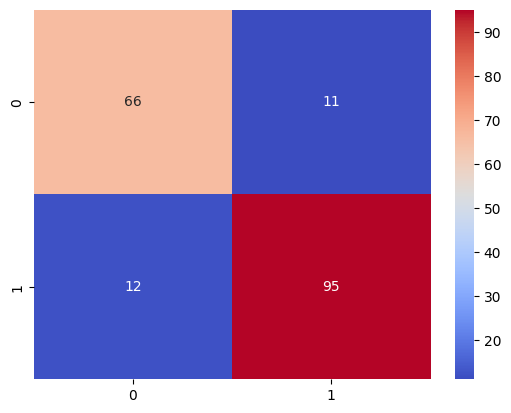

In [129]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='coolwarm')

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

In [131]:
r2=accuracy_score(y_pred,y_test)
r2

0.8641304347826086

In [132]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])